# Lab 21 - Simple linear regression

We will use the dataset with information about the labor market for recent college graduates from Lab 20.  You can download the CSV file [here](http://comet.lehman.cuny.edu/owen/teaching/mat128/Feb2019_labor_market_majors.csv).

We need to download another library called `statsmodel`:

In [ ]:
!pip install --user statsmodel

Import Seaborn and the other libraries so we can use them in our code.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
%matplotlib inline

### Loading and cleaning the data

As in Lab 20 we need to read our CSV file into a dataframe and clean it.

Load the data in the dataframe `labor`, remembering to skip the non-data rows at the start and end of the file.

In [6]:
labor = pd.read_csv("../../data/Feb2019_labor_market_majors.csv",skiprows = 13, skipfooter = 3)

/Users/megan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


Display your `labor` dataframe below to check it was created properly.

In [7]:
labor

,Major,Unemployment Rate,Underemployment Rate,Median Wage Early Career,Median Wage Mid-Career,Share with Graduate Degree
0,Agriculture,3.1,53.9,"40,000","60,000",20.8
1,Animal and Plant Sciences,3.0,57.4,"35,000","60,000",34.8
2,Environmental Studies,4.6,49.3,"36,000","65,000",32.2
3,Architecture,4.3,26.6,"45,000","75,000",37.4
4,Ethnic Studies,5.7,50.1,"38,000","57,000",49.4
5,Communications,3.9,53.0,"40,000","70,000",23.3
6,Journalism,3.7,42.5,"38,000","65,000",25.3
7,Mass Media,7.8,55.2,"35,000","60,000",18.3
8,Advertising and Public Relations,3.7,47.7,"40,000","72,000",18.3
9,Information Systems and Management,5.0,38.1,"50,000","75,000",24.0


To make things easier, we will rename the columns to shorter names without spaces.

In [8]:
labor.columns = ["major","unemployment","underemployment","early","mid","graduate"]

Next we need to remove the commas from the `early` and `mid` columns, and change the column type to float, as in Lab 20.

In [9]:
labor["early"] = labor["early"].str.replace(",","").astype(float)
labor["mid"] = labor["mid"].str.replace(",","").astype(float)

Check that this code worked correctly by displaying `labor` again:

In [10]:
labor.head()

,major,unemployment,underemployment,early,mid,graduate
0,Agriculture,3.1,53.9,40000.0,60000.0,20.8
1,Animal and Plant Sciences,3.0,57.4,35000.0,60000.0,34.8
2,Environmental Studies,4.6,49.3,36000.0,65000.0,32.2
3,Architecture,4.3,26.6,45000.0,75000.0,37.4
4,Ethnic Studies,5.7,50.1,38000.0,57000.0,49.4


### Simple linear regression

Recall from Lab 20 that the columns `early` (which was `Median Wage Early Career`) and `mid` (which was `Median Wage Mid-Career`) were the most correlated, with a correlation of 0.848. 

Let's remind ourselves what the relationship looked like by plotting a scatter plot with `early` on the x axis and `mid` on the y axis.

Text(0,0.5,'Median Wage Mid-Career')

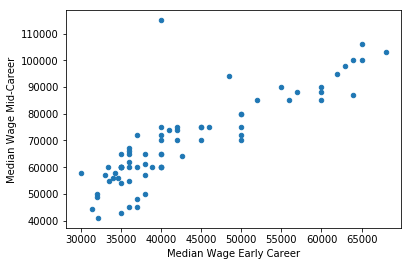

In [11]:
labor.plot.scatter(x = "early", y = "mid")
plt.xlabel("Median Wage Early Career")
plt.ylabel("Median Wage Mid-Career")

We can perform linear regression with the following code, which does not display anything:

In [12]:
lm = smf.ols(formula = 'mid ~ early', data = labor).fit()

The formula is always `dependent_variable ~ independent_variable`, and in this form, the variable names, which are the column names, cannot have spaces in them or else we need to use `Q('variable name with spaces')`.

All the information about the linear model is stored in the variable `lm`.  To see this information, type and run  `lm.summary()` below. 

In [13]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mid   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     181.7
Date:                Thu, 14 Nov 2019   Prob (F-statistic):           2.98e-21
Time:                        08:29:42   Log-Likelihood:                -765.31
No. Observations:                  73   AIC:                             1535.
Df Residuals:                      71   BIC:                             1539.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.014e+04   4498.265      2.254      0.027    1168.816    1.91e+04
early          1.3762      0.102     13.478      0.000       1.173       1.580
==============================================================================
Omnibus:                       64.069   Durbin-Watson:                   1.550
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              593.324
Skew:                           2.370   Prob(JB):                    1.45e-129
Kurtosis:                      16.137   Cond. No.                     1.93e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.93e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This is a lot of information!  We will only focus on a few of the numbers.  The coefficients for the regression line can be found in the middle section, under the column `coef`: $\beta_0 = 1.014 \times 10^4 = 10140$ and $\beta_1 = 1.37632$.  Thus, the regression line equation is $y = 1.37632x + 10140$

You can also get the coefficients by typing `lm.params`:

In [14]:
lm.params

Intercept    10138.101598
early            1.376232
dtype: float64

We will use Seaborn to plot the regression line on the scatterplot in one step.  Type and run the code: `sns.regplot(x = 'early',y = 'mid', data = labor)`

Text(0,0.5,'Median Wage Mid-Career')

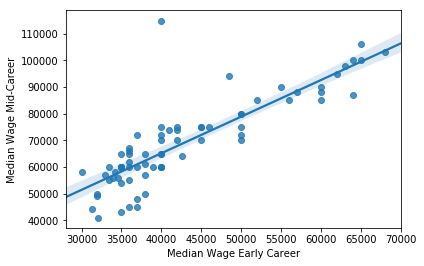

In [15]:
sns.regplot(x = 'early',y = 'mid', data = labor)
plt.xlabel("Median Wage Early Career")
plt.ylabel("Median Wage Mid-Career")

To further check if the linear model is a good fit for the data, we can plot the residuals to see if they have a normal distribution.  To get the residuals, type `lm.resid` below.

In [16]:
lm.resid

0     -5187.363306
1      1693.794408
2      5317.562865
3      2931.478981
4     -5434.900221
5      4812.636694
6      2565.099779
7      1693.794408
8      6812.636694
9     -3949.678733
10     -464.457245
11   -14682.437135
12   -13315.134119
13   -15306.205592
14   -12434.900221
15   -16058.668678
16   -13058.668678
17    -4711.994160
18     1783.079669
19     -721.846502
20    -2711.994160
21     6406.848126
22      406.848126
23   -11216.920331
24     1159.311212
25    -7711.994160
26     1693.794408
27    -4177.510964
28     1693.794408
29     3895.764876
          ...     
43     -929.974050
44    -1058.668678
45    -5187.363306
46    -9014.148884
47     1446.257493
48     4169.163553
49     2060.173609
50     7060.173609
51    -1755.712975
52      317.562865
53    -2207.067989
54    -3673.508609
55    -1241.858278
56     6574.952121
57    -5187.363306
58    -4682.437135
59    -4765.565317
60    -8949.678733
61    49812.636694
62     7317.562865
63    -2068.521019
64    -6949.

Can you figure out how to plot the residuals as a histogram?  They are already stored as a Pandas Series.

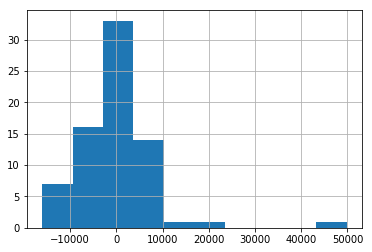

In [17]:
lm.resid.hist()

Does the distribution of the residuals look normal?  Can you find the residual outlier on the scatter plot?  Can you figure out what major that is?  We looked at how to identify outliers in Lab 5. 

In [18]:
labor.iloc[labor["mid"].idxmax()]

major              Pharmacy
unemployment            3.7
underemployment        28.7
early                 40000
mid                  115000
graduate               58.8
Name: 61, dtype: object

<details> <summary>Answer:</summary>
The outlier has the greatest mid-career median wage, so we can look for the row with the max value in this column:<br>
<code>max_row = labor["mid"].idxmax()</code><br>
and then display that row:<br>
<code>labor.iloc[max_row]</code>
</details>

### Regression line: underemployment vs. median wage early career

The next two most correlated columns were `underemployment` and `early`, with a correlation of -0.564108. Compute the linear regression model with `underemployment` as the independent variable and `early` as the dependent variable.

Display a summary of your linear regression model.

What is the equation for the linear regression line?

Use the Seaborn package to plot the scatter plot of underemployment vs. median wage early career with the regression line.

Plot the residuals as a histogram.

Is the distribution of the residuals roughly normal?  Is your linear regression model a good representation of the relationship between underemployment and median wage early career?

### Challenges
- In the green taxi trip data, what is the correlation between trip distance and fare amount?  Compute the linear regression line with trip distance as the independent variable and fare amount as the dependent variable.  Find the equation for the regression line, plot the scatterplot with the line, and check if the residuals are normally distributed.